# Introduction
In this page I'll do data analysis on activity trackers in France. Over 900 people volunteert for this research. The results were put into a csv.file which was later used for this analysis.

# Data cleaning

In [1]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

df1 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv') 
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
def clean_weight(x):
    if x > 200.0 or x < 40.0: 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(clean_weight)

In [5]:
df['mean_steps'] = df.iloc[:328].mean(axis=1)
df.head()

/var/folders/ng/0qb2phpj5q312sx686hppj0m0000gn/T/ipykernel_32544/417254930.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['mean_steps'] = df.iloc[:328].mean(axis=1)


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9907.035294
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5519.720238
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8032.196078
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,2917.120000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4866.016949


In [6]:
df = df[df['mean_steps'].notna()]

# Exploratory data analysis


In [7]:
df.describe()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,hh_size,education,height,weight,mean_steps
count,328.000000,6.000000,78.000000,89.000000,98.000000,126.000000,123.00000,117.000000,139.000000,146.000000,...,29.000000,33.000000,31.000000,26.000000,0.0,328.000000,328.000000,327.000000,326.000000,328.000000
mean,164.500000,2180.333333,9489.384615,11739.415730,7284.714286,8053.150794,8773.97561,8246.444444,7950.776978,9715.315068,...,9428.896552,8773.757576,8140.967742,7586.076923,NaN,2.402439,2.527439,170.963303,71.717791,6242.844261
std,94.829672,3005.487625,5993.997517,6975.933652,6300.946532,6359.819709,4529.45696,5885.323192,3878.200468,5189.119875,...,6620.168364,6396.323588,9965.767231,6063.530285,NaN,1.371263,1.272808,9.248041,15.705760,4338.633850
min,1.000000,164.000000,67.000000,25.000000,72.000000,11.000000,154.00000,7.000000,4.000000,18.000000,...,2849.000000,103.000000,16.000000,1129.000000,NaN,1.000000,1.000000,145.000000,45.000000,55.800000
25%,82.750000,250.000000,4858.500000,6916.000000,2765.500000,3804.000000,5532.00000,4182.000000,5142.000000,6219.000000,...,5523.000000,5529.000000,2388.000000,4791.500000,NaN,1.000000,1.000000,163.500000,60.250000,3756.899123
50%,164.500000,274.000000,10127.000000,10334.000000,6037.500000,7468.000000,8633.00000,7663.000000,8132.000000,8858.000000,...,7516.000000,6713.000000,4648.000000,6431.500000,NaN,2.000000,2.000000,170.000000,70.000000,5665.512577
75%,246.250000,4619.500000,12167.500000,15272.000000,10315.500000,10680.000000,11416.50000,11247.000000,10449.000000,12688.500000,...,9916.000000,10639.000000,6248.000000,8296.000000,NaN,3.000000,4.000000,178.000000,80.000000,8038.335465
max,328.000000,6060.000000,34912.000000,39165.000000,40392.000000,29862.000000,22847.00000,26535.000000,17476.000000,28078.000000,...,33379.000000,27605.000000,36031.000000,33660.000000,NaN,11.000000,5.000000,195.000000,149.000000,54793.113924


/Users/pepijnvanvugt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pepijnvanvugt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


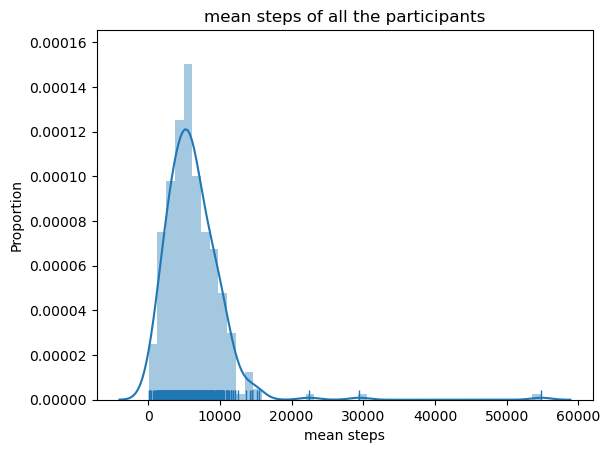

In [8]:
sns.distplot(df['mean_steps'], rug=True)
plt.title('mean steps of all the participants')
plt.xlabel('mean steps')
plt.ylabel('Proportion')
plt.show()

In [9]:
print("Mean of the mean steps inside the dataframe = ",df['mean_steps'].mean())
print("Median of the mean steps inside the dataframe = ",df['mean_steps'].median())
print("Standard deviation of the mean steps inside the dataframe = ",df['mean_steps'].std())

Mean of the mean steps inside the dataframe =  6242.844261315106
Median of the mean steps inside the dataframe =  5665.512577098418
Standard deviation of the mean steps inside the dataframe =  4338.63384953946


Normality: the distribution quite equal and most people are around the 10.000 steps.

Variation: there is little variation, most people are between 2.000 and 10.000 steps.

Modality: there is one peak.

Skewness: the distribution is skewed to the right.

Outliers: there are a few outliers, around 30.000 and 55.000 steps.

/Users/pepijnvanvugt/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


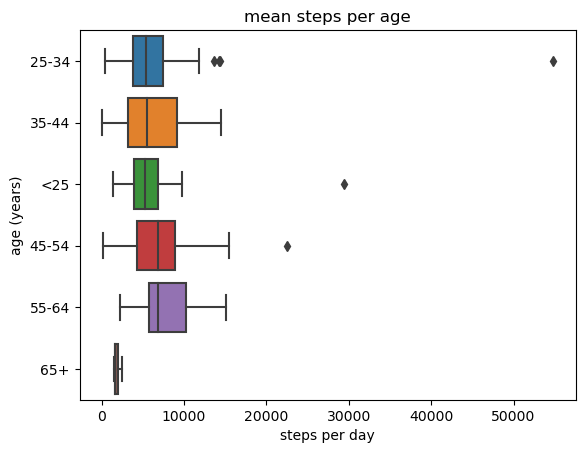

In [10]:
#ax = sns.boxplot(x="day", y="total_bill", data=tips)
#sns.scatterplot(df['mean_steps'],df['age'], hue=df['age'])

sns.boxplot(df['mean_steps'],df['age'])
plt.xlabel('steps per day')
plt.ylabel("age (years)")
plt.title('mean steps per age')
plt.show()

Normality: What stands out is that the age group of 55-64 has the higgest average steps per day in comparison to the other age groups. The youngest age group has the biggest outlier, but with the age group of younger than 25 the lowest average steps per day.

Variation: There is quite a big variation between the older and younger age groups. The middle age group of 35-44 has a high average of daily steps compared to the age group above (45-54).

Modality: Difficult to see.

Skewness: The age groups of 35-44 and 55-64 has a right skewed (positive) distribution. The age group of 45-54 has a negative (left) distribution. The remaining age groups have a normal distribution.

Outliers: There are a few outliers in this graph. The one that is most significant is the point at around 57.500 steps in the age group of 25-34 year olds. Also the age group of below 25 has a big outlier with just below 30.000 steps per day.

# Feature engineering
BMI can be a variable that can give a better indication of a healthy weight than weight alone. 

# Exploratory data analysis


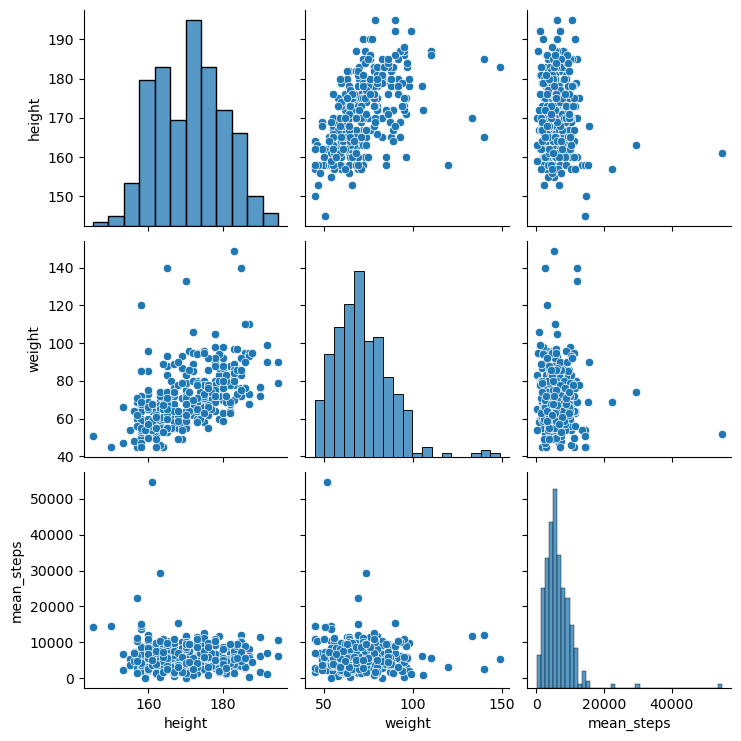

In [11]:
df_subset = df[['height', 'weight', 'mean_steps']] #making a new dataframe with a subset
sns.pairplot(df_subset)
plt.show()

# Scatterplot interpetation
- All three variables have an unimodal distribution (one clear peak)
- The height follow a normal distribution (positive)
- Weigth and mean_steps are right skewed
- There seems to be a positive correlation between weight and mean_steps

In [12]:
corr = df[['height', 'weight', 'mean_steps']].corr()
corr

,height,weight,mean_steps
height,1.000000,0.527248,-0.104666
weight,0.527248,1.000000,-0.079455
mean_steps,-0.104666,-0.079455,1.000000


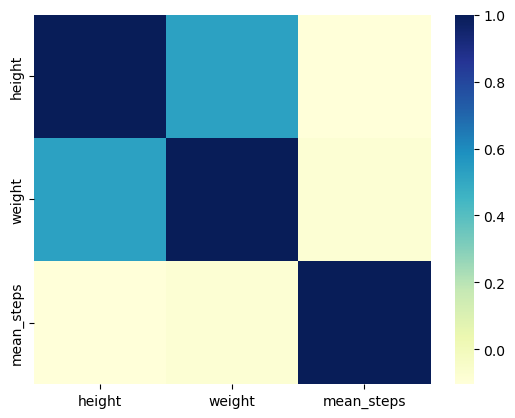

In [13]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") #the last two arguments set the column names
plt.show()

# Results:
The plot is symmetrical about the diagonal since the same two variables are being paired together in those squares.

# Predictive model

Linear regression is an algorithm that predicts results and/or relationships between two different variables.

In [14]:
dummies_gender = pd.get_dummies(df["gender"])
dummies_gender

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
323,1,0
324,1,0
325,0,1
326,0,1


In [15]:
dummies_city = pd.get_dummies(df["city"])
dummies_city

,Bordeaux,Lille,Lyon,Montpellier
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
323,0,0,1,0
324,0,0,1,0
325,0,1,0,0
326,1,0,0,0


In [16]:
dummies_age = pd.get_dummies(df["age"])
dummies_age

,25-34,35-44,45-54,55-64,65+,<25
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
...,...,...,...,...,...,...
323,0,0,1,0,0,0
324,0,0,0,0,0,1
325,1,0,0,0,0,0
326,0,0,0,0,0,1


In [17]:
dummies_education_1 = pd.get_dummies(df["education_1"])
dummies_education_1

,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
323,1,0,0,0,0,0
324,0,0,0,0,0,1
325,1,0,0,0,0,0
326,1,0,0,0,0,0


In [18]:
df = pd.concat([df, dummies_gender, dummies_city, dummies_age, dummies_education_1], axis=1)
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,45-54,55-64,65+,<25,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,0,0,0,0,0,0,1,0,0,0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0,0,0,0,1,0,0,0,0,0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0,0,0,0,0,0,1,0,0,0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,1,0,0,0,0,0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
324,325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,1
325,326,NaN,11187.0,9072.0,7615.0,1326.0,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
326,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,1,0,0,0,0,0


In [28]:

X = df[['Female', 'Male', '25-34', '35-44', '45-54', '55-64', '65+', '<25']] #to use sk-learn, we need to create lists of the two variables
y = df['mean_steps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train) #this "fits" the model on the training data
LinearRegression()

LinearRegression()

In [21]:
y_test_p = lm.predict(X_test)

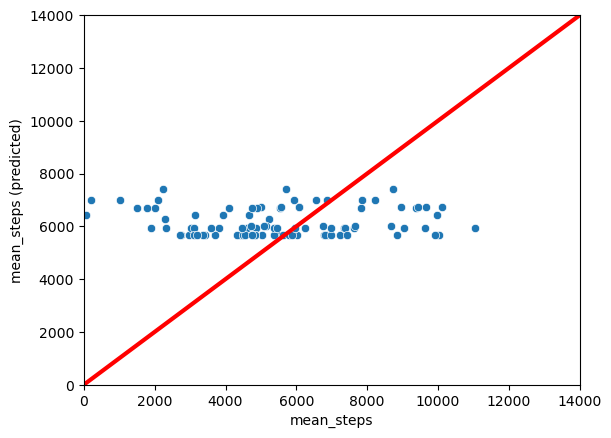

In [26]:
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 14000) 
plt.ylim(0, 14000) 
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) 
plt.xlabel('mean_steps')
plt.ylabel('mean_steps (predicted)')
plt.show()

In [29]:
r2_score(y_test, y_test_p)

-0.004238420532060694

In [30]:
math.sqrt(mean_squared_error(y_test, y_test_p))

5693.5595200613125

# Results
- The model doesn't fit the data which results in a negative R2 score. 
- The residuals are also quite high with around 5700 steps. 
- These results mean that this data doesn't fit the model, and that a different model needs to be used to predict the mean_steps per participant, for example random forest.
To conclude, the model performs very very poorly on this dataset.